**Partie 1 : Régression Linéaire Simple**

Etape 1 : Chargement des données et nettoyage

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Charger le jeu de données Boston
df = pd.read_csv('/content/boston_house_prices.csv', sep=";")
print(df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  


In [101]:
# Vérifier les valeurs manquantes
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [102]:
# Vérification des doublons
print(f"Nombre de doublons : {df.duplicated().sum()}")
df = df.drop_duplicates()

Nombre de doublons : 0


Le dataset est propre car toutes les colonnes ont zéro valeur manquante et zéro doublons

Étape 2 : Statistiques descriptives

In [103]:
# Statistiques descriptives
print(df[['RM', 'MEDV']].describe())

               RM        MEDV
count  506.000000  506.000000
mean     6.284634   22.532806
std      0.702617    9.197104
min      3.561000    5.000000
25%      5.885500   17.025000
50%      6.208500   21.200000
75%      6.623500   25.000000
max      8.780000   50.000000


Étape 3 : Entraînement du modèle

In [104]:
# Diviser les données
X = df[['RM']]  # Variable indépendante
Y = df['MEDV']  # Variable cible

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entraîner le modèle
lin_reg = LinearRegression()
lin_reg.fit(X_train, Y_train)

# Prédictions
Y_pred = lin_reg.predict(X_test)


Le modèle apprend la relation entre RM et MEDV et utilise cette relation pour prédire les prix des maisons.

Étape 4 : Visualisation

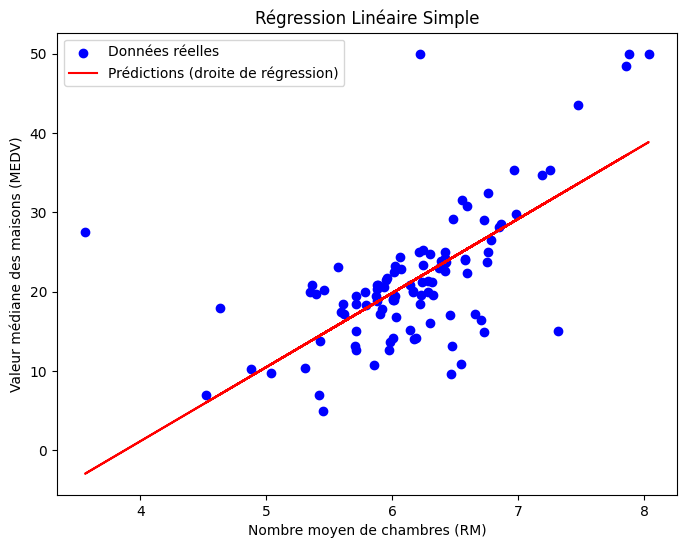

In [105]:
# Visualisation de la droite de régression
plt.figure(figsize=(8, 6))
plt.scatter(X_test, Y_test, color='blue', label='Données réelles')
plt.plot(X_test, Y_pred, color='red', label='Prédictions (droite de régression)')
plt.title('Régression Linéaire Simple')
plt.xlabel('Nombre moyen de chambres (RM)')
plt.ylabel('Valeur médiane des maisons (MEDV)')
plt.legend()
plt.show()

Étape 5 : Évaluation

In [106]:
# Calcul des métriques
rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
r2 = r2_score(Y_test, Y_pred)

print(f"RMSE : {rmse:.2f}")
print(f"R² : {r2:.2f}")

RMSE : 6.79
R² : 0.37


Étape 6 : Validation croisée

In [107]:
# Validation croisée
cv_scores = cross_val_score(lin_reg, X, Y, cv=5, scoring='r2')
print(f"Scores de validation croisée : {cv_scores}")
print(f"Score moyen : {np.mean(cv_scores):.2f}")

Scores de validation croisée : [ 0.70708692  0.63476138  0.50385441 -0.21594318 -1.77736913]
Score moyen : -0.03


Étape 7 : Interprétation des coefficients

In [108]:
# Coefficient et intercept
print(f"Coefficient : {lin_reg.coef_[0]:.2f}")
print(f"Intercept : {lin_reg.intercept_:.2f}")

Coefficient : 9.35
Intercept : -36.25


**Interprètation des résultats**

Une RMSE de 6,79 signifie que, en moyenne, les prédictions du modèle s’écartent de 6,79 unités de la valeur réelle. Étant donné que la cible (MEDV) correspond à la valeur médiane des maisons (en milliers de dollars), cela représente une erreur moyenne d’environ 6 790 dollars.

Une valeur de
𝑅
2
=
0.37 signifie que 37 % de la variation des prix des maisons est expliquée par la relation avec la variable indépendante RM (nombre moyen de chambres).
 Un
𝑅
2 inférieur à 0,5 indique que le modèle basé sur une seule variable (RM) ne capture pas suffisamment d’information pour expliquer les variations de MEDV.

Score moyen : -0.03
Une moyenne négative indique que, dans l’ensemble, le modèle ne généralise pas bien et que la relation linéaire entre RM et MEDV est insuffisante pour expliquer les données.

Coefficient : 9.35
Interprétation : Un coefficient de 9,35 signifie qu’une augmentation d’une chambre moyenne (RM) dans un logement entraîne une augmentation prédite de 9 350 dollars dans le prix médian des maisons, toutes choses étant égales par ailleurs.


**Conclusion**

Le modèle donne une indication de la relation entre le nombre moyen de chambres et les prix des maisons, mais il est insuffisant pour des prédictions fiables ou généralisables. Un modèle plus complexe et des données enrichies sont nécessaires.

**Partie 2 : Régression Linéaire Multiple**

1. Statistiques descriptives

In [109]:
# Statistiques descriptives pour toutes les variables
print("Statistiques descriptives pour toutes les variables :")
print(df.describe())

# Séparer les variables indépendantes (features) et la cible (target)
X = df.drop(columns=['MEDV'])
Y = df['MEDV']

# Statistiques descriptives pour les variables indépendantes
print("\nStatistiques descriptives des variables indépendantes :")
print(X.describe())

# Statistiques descriptives pour la variable cible
print("\nStatistiques descriptives de la variable cible :")
print(Y.describe())

Statistiques descriptives pour toutes les variables :
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154 

2. Visualisation

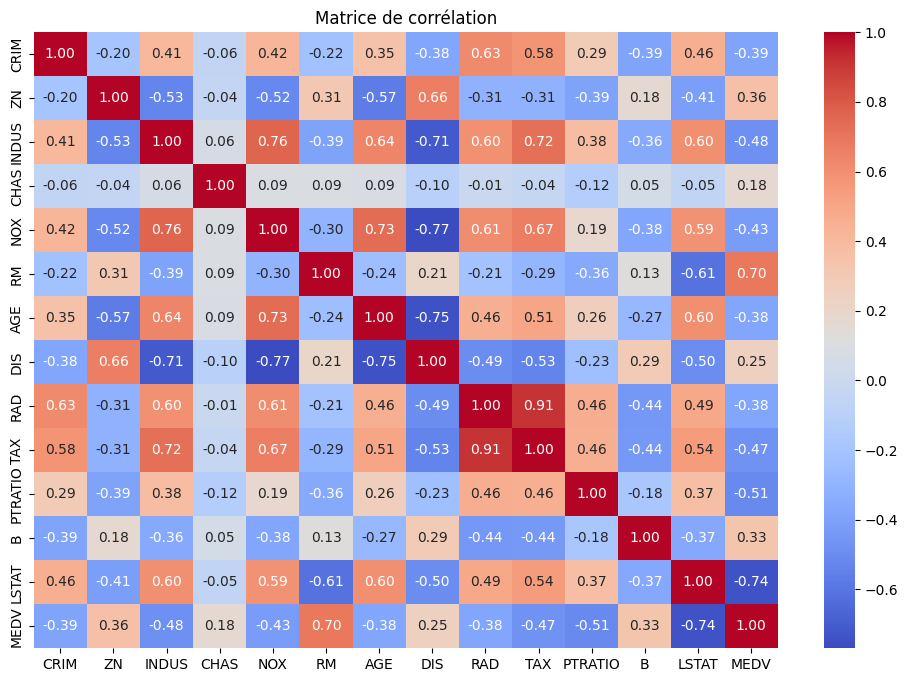

In [110]:
# Matrice de corrélation
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrice de corrélation")
plt.show()

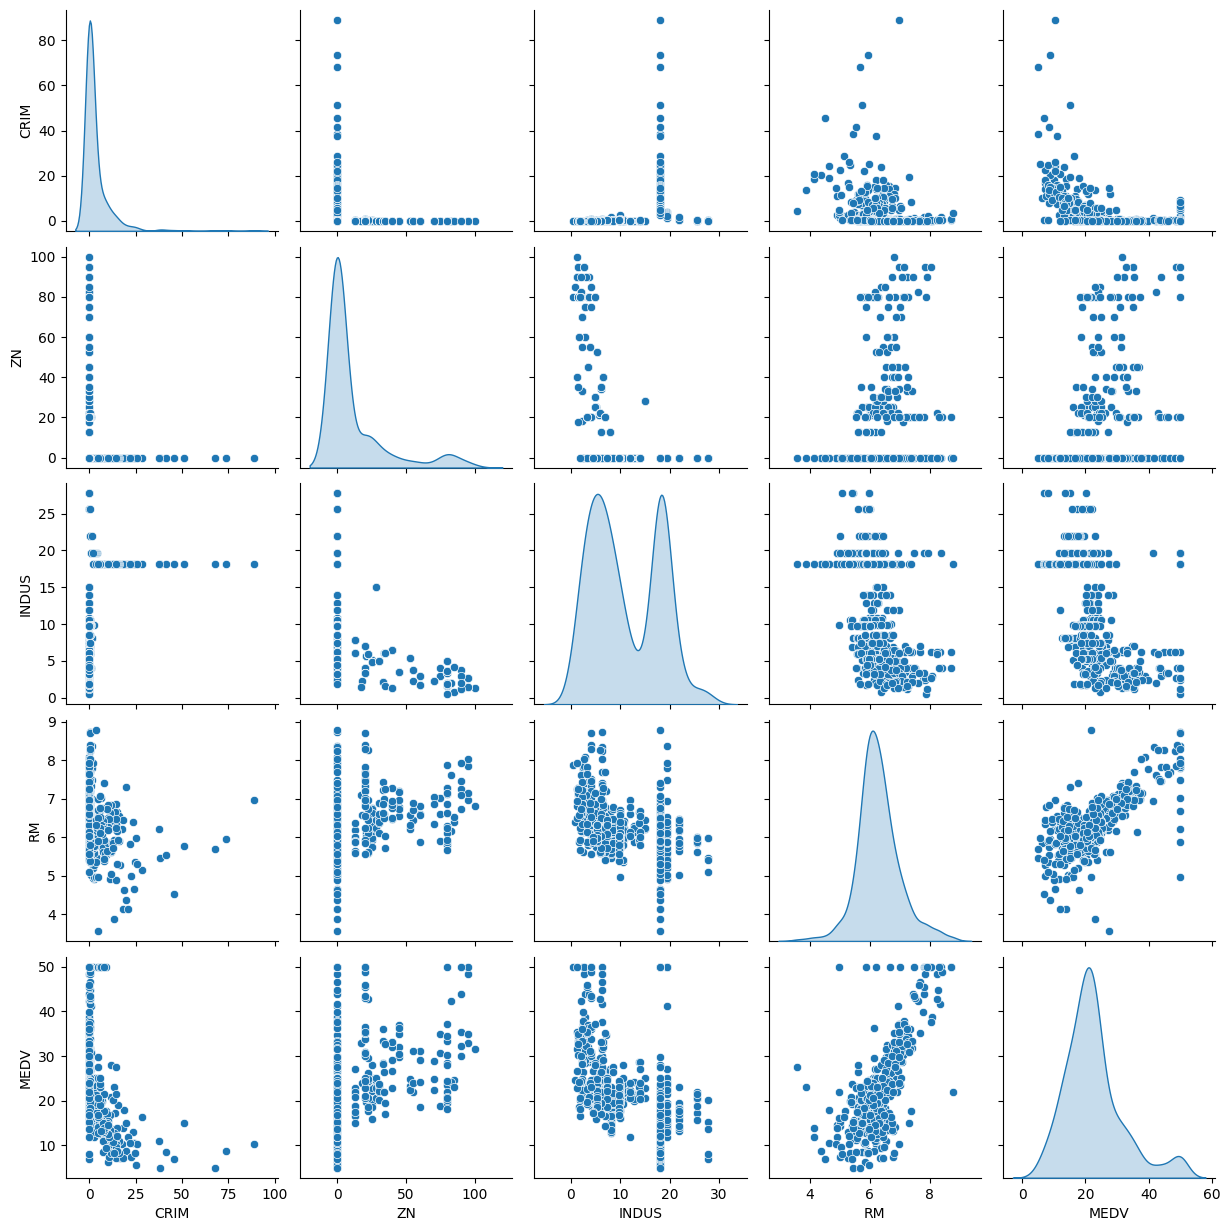

In [111]:
# Pairplot pour observer les relations entre variables
sns.pairplot(df, vars=['CRIM', 'ZN', 'INDUS', 'RM', 'MEDV'], diag_kind='kde')
plt.show()

<ipython-input-112-d9790b103e7d>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Variable', data=coefficients, palette='viridis')


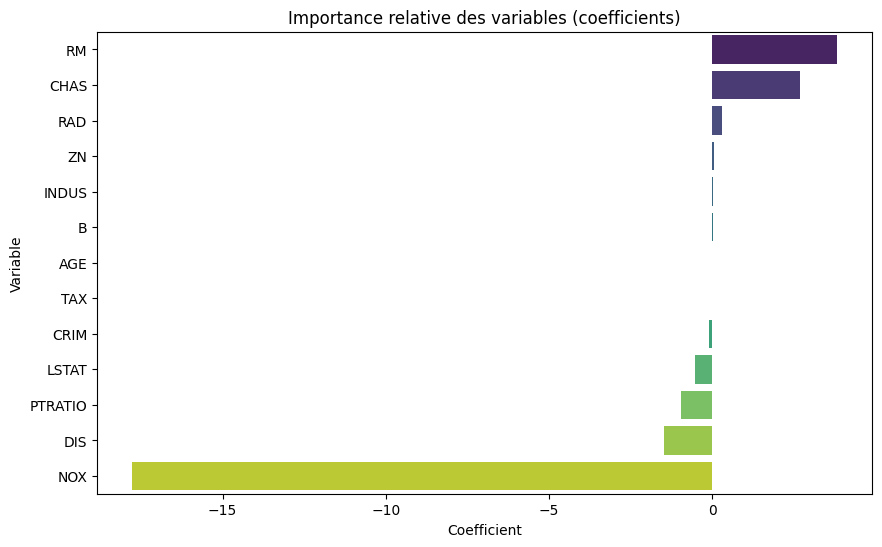

In [112]:
# Entraîner une régression linéaire pour obtenir les coefficients
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, Y)

# Afficher les coefficients
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

# Visualisation
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Variable', data=coefficients, palette='viridis')
plt.title("Importance relative des variables (coefficients)")
plt.xlabel("Coefficient")
plt.ylabel("Variable")
plt.show()

3. Entraînement du modèle

In [113]:
# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entraîner le modèle de régression linéaire multiple
lin_reg_multi = LinearRegression()
lin_reg_multi.fit(X_train, Y_train)

# Prédictions
Y_pred_multi = lin_reg_multi.predict(X_test)

4. Évaluation du modèle

In [114]:
# Calcul des métriques
rmse_multi = np.sqrt(mean_squared_error(Y_test, Y_pred_multi))
r2_multi = r2_score(Y_test, Y_pred_multi)

print(f"RMSE : {rmse_multi:.2f}")
print(f"R² : {r2_multi:.2f}")

RMSE : 4.93
R² : 0.67


5. Validation croisée

In [115]:
# Validation croisée pour évaluer les performances du modèle
cv_scores = cross_val_score(lin_reg_multi, X, Y, cv=5, scoring='r2')
print(f"Scores de validation croisée : {cv_scores}")
print(f"Score moyen : {np.mean(cv_scores):.2f}")

Scores de validation croisée : [ 0.63919994  0.71386698  0.58702344  0.07923081 -0.25294154]
Score moyen : 0.35


Examiner les coefficients des variables :

In [116]:
# Examiner les coefficients
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': lin_reg_multi.coef_
}).sort_values(by='Coefficient', ascending=False)

print("Coefficients des variables :")
print(coefficients)

Coefficients des variables :
   Variable  Coefficient
5        RM     4.438835
3      CHAS     2.784438
8       RAD     0.262430
2     INDUS     0.040381
1        ZN     0.030110
11        B     0.012351
6       AGE    -0.006296
9       TAX    -0.010647
0      CRIM    -0.113056
12    LSTAT    -0.508571
10  PTRATIO    -0.915456
7       DIS    -1.447865
4       NOX   -17.202633


**Interprètation**

Ici, un RMSE de 4.93 indique que, en moyenne, les prédictions s’écartent de 4 930 dollars du prix réel des maisons.

Un
𝑅
2
de 0.67 signifie que 67 % de la variation des prix des maisons est expliquée par les variables indépendantes incluses dans le modèle.

Score moyen : 0.35
Bien que modérément positif, un score moyen de 0.35 est inférieur à celui observé sur l’ensemble de test (
𝑅
2
=
0.67
Cela peut indiquer une suradéquation du modèle aux données d'entraînement (overfitting).

Variables avec un impact significatif :

- NOX (-17.20) : L'augmentation de la concentration d'oxydes nitriques (NOX)
a un impact négatif considérable sur le prix des maisons. Cela est cohérent,
car la pollution peut diminuer l'attractivité des propriétés.
- RM (4.44) : Le nombre moyen de chambres (RM) est un facteur positif
important, comme déjà observé dans la régression simple. Les maisons avec
plus de chambres sont généralement plus chères.

- CHAS (2.78) : Les maisons proches du fleuve Charles ont une valeur
significativement plus élevée, ce qui reflète une localisation désirable.

Variables avec un impact modéré :

- DIS (-1.45) : Une plus grande distance aux centres d'emploi (DIS) diminue
légèrement les prix, reflétant une moindre commodité.
- PTRATIO (-0.91) : Une augmentation du ratio élèves/enseignants dans la
région est associée à une baisse des prix, probablement en raison de la
qualité perçue des écoles.
Variables avec un impact faible :

- CRIM (-0.11) : Le taux de criminalité a un effet négatif, mais modéré, sur les
prix. Cela peut refléter des quartiers où d'autres facteurs compensent un taux
de criminalité élevé.
- ZN, INDUS, B, TAX, AGE : Ces variables ont un impact relativement faible,
leur influence directe sur MEDV est donc limitée dans ce modèle.

Limites possibles :
Certaines variables peuvent être corrélées (multicolinéarité), ce qui peut biaiser les
coefficients. Par exemple, AGE et TAX peuvent être corrélées avec d'autres variables.
Le modèle est linéaire et peut ne pas capturer toutes les relations complexes entre les
variables.




**Conclusion**

Ce modèle explique une part importante des variations des prix des maisons (71 %), mais ses performances sont limitées par sa linéarité et sa sensibilité aux données. Il constitue une bonne base, mais il serait intéressant de tester des approches plus avancées pour obtenir des prédictions encore plus robustes et fiables.

**Partie 3 : Régression avec Arbre de Décision**

Etape 1 : Entrainement du modèle

In [117]:
from sklearn.tree import DecisionTreeRegressor

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Entraîner un modèle d'arbre de décision
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, Y_train)

DecisionTreeRegressor(random_state=42)

Etape 2 : Visualisation de l'arbre de décision

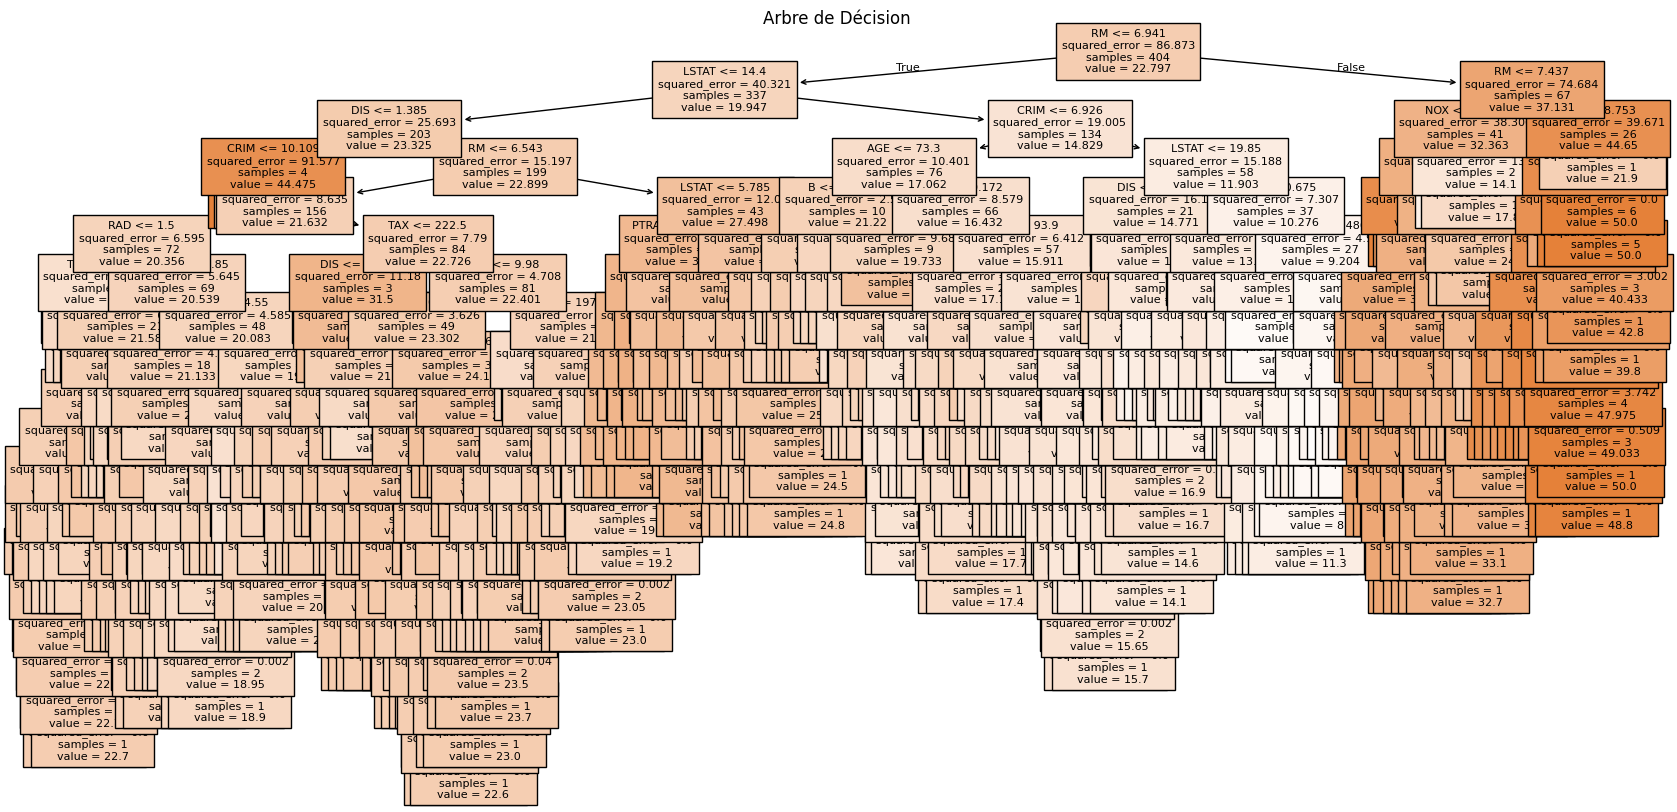

In [118]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualisation de l'arbre
plt.figure(figsize=(20, 10))
plot_tree(tree_model, feature_names=X.columns, filled=True, fontsize=8)
plt.title("Arbre de Décision")
plt.show()

Prédictions vs valeurs réelles :

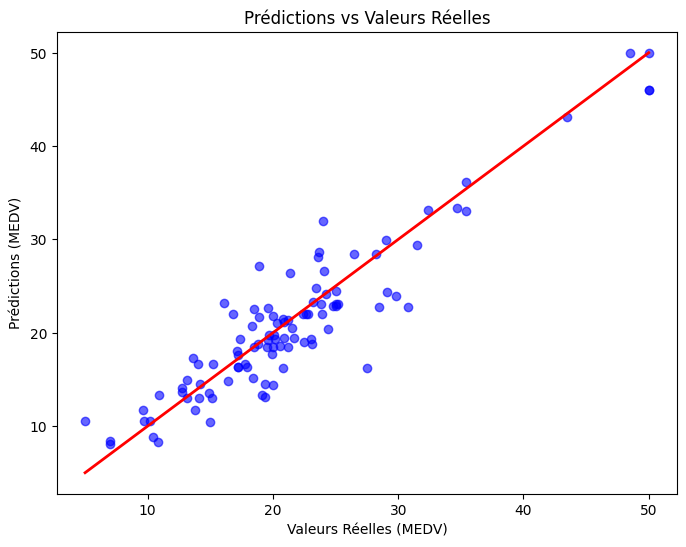

In [119]:
# Prédictions sur l'ensemble de test
Y_pred_tree = tree_model.predict(X_test)

# Comparaison des prédictions et des valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred_tree, alpha=0.6, color='blue')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', linewidth=2)
plt.title("Prédictions vs Valeurs Réelles")
plt.xlabel("Valeurs Réelles (MEDV)")
plt.ylabel("Prédictions (MEDV)")
plt.show()

Évaluation du modèle

In [120]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Calculer les métriques
rmse_tree = np.sqrt(mean_squared_error(Y_test, Y_pred_tree))
r2_tree = r2_score(Y_test, Y_pred_tree)

print(f"RMSE : {rmse_tree:.2f}")
print(f"R² : {r2_tree:.2f}")

RMSE : 3.23
R² : 0.86


4. Validation croisée

In [121]:
from sklearn.model_selection import cross_val_score

# Validation croisée pour évaluer la généralisation
cv_scores = cross_val_score(tree_model, X, Y, cv=5, scoring='r2')
print(f"Scores de validation croisée : {cv_scores}")
print(f"Score moyen : {np.mean(cv_scores):.2f}")

Scores de validation croisée : [ 0.64094316  0.59961443  0.60584919  0.38243102 -1.77924496]
Score moyen : 0.09


5. Optimisation des paramètres

In [122]:
from sklearn.model_selection import GridSearchCV

# Définir la grille de paramètres
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Recherche sur grille
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, Y_train)

# Meilleurs paramètres
print("Meilleurs paramètres :", grid_search.best_params_)

# Meilleur modèle
best_tree_model = grid_search.best_estimator_

# Évaluer le modèle optimisé
Y_pred_optimized = best_tree_model.predict(X_test)
rmse_optimized = np.sqrt(mean_squared_error(Y_test, Y_pred_optimized))
r2_optimized = r2_score(Y_test, Y_pred_optimized)

print(f"RMSE après optimisation : {rmse_optimized:.2f}")
print(f"R² après optimisation : {r2_optimized:.2f}")

Meilleurs paramètres : {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
RMSE après optimisation : 3.06
R² après optimisation : 0.87


**Interprètation**

RMSE = 3.23  Indique une erreur moyenne de prédiction de 3.23 unités. Cela signifie que, en moyenne, les prédictions du modèle diffèrent des valeurs réelles de 3.23 milliers de dollars. Cela montre une performance initiale déjà raisonnablement bonne.

𝑅
2 = 0.86  Le modèle explique 86 % de la variance des données, ce qui est très satisfaisant.

Les scores de validation croisée varient fortement, allant de 0.64 à -1.77, ce qui indique une forte variabilité de la performance du modèle sur différents sous-ensembles des données.
Le score moyen de 0.09 montre que le modèle peut être instable ou surajusté à certaines données.

Après ajustement des hyperparamètres (max_depth=5, min_samples_leaf=2, min_samples_split=2), la performance s'améliore légèrement :
RMSE diminue à 3.06, indiquant une meilleure précision des prédictions.
𝑅
2 augmente à 0.87, montrant une légère amélioration de l’explicabilité du modèle.


**Conclusion**

Le modèle de régression par arbre de décision offre initialement de bonnes performances (
𝑅
2
=
0.86, mais la validation croisée révèle une variabilité importante dans les résultats. Après optimisation, la précision s’améliore légèrement, mais l'instabilité reste un point de vigilance. Pour une meilleure robustesse, il serait pertinent d'explorer d'autres modèles (comme les forêts aléatoires ou le boosting) et d'augmenter la quantité ou la qualité des données.

**Partie 4 : Forêt Aléatoire**

Entrainement du modèle

In [123]:
# Séparer en données d'entraînement et de test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [124]:
# Entraîner une Forêt Aléatoire avec paramètres de base
rf = RandomForestRegressor(n_estimators=100, max_depth=None, random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

Visualisation

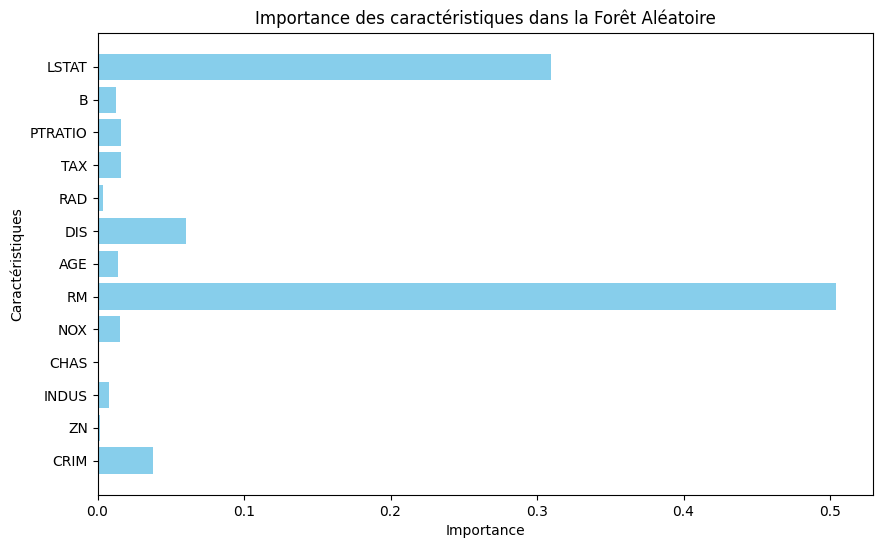

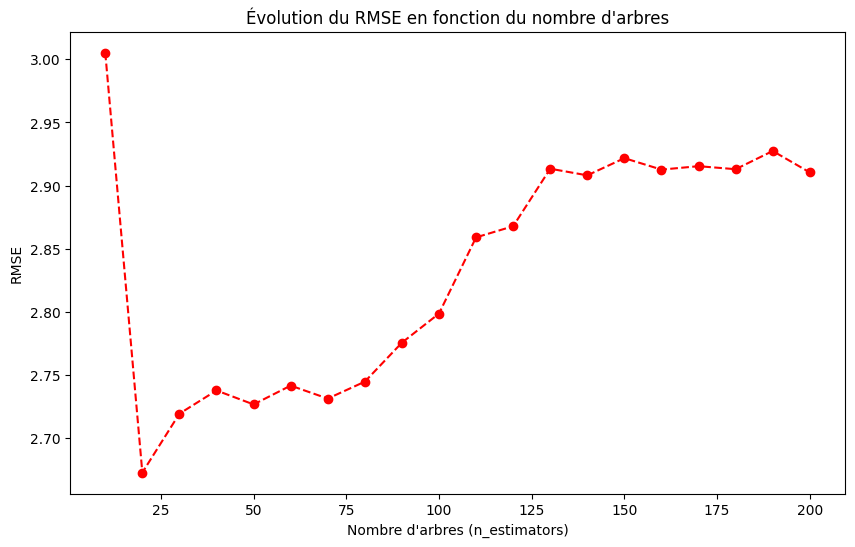

In [125]:
# Importance des caractéristiques
importances = rf.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features, importances, color='skyblue')
plt.xlabel("Importance")
plt.ylabel("Caractéristiques")
plt.title("Importance des caractéristiques dans la Forêt Aléatoire")
plt.show()

# Courbe d'erreur RMSE en fonction de n_estimators
rmse_list = []
n_trees = range(10, 201, 10)

for n in n_trees:
    rf_temp = RandomForestRegressor(n_estimators=n, max_depth=None, random_state=42)
    rf_temp.fit(X_train, Y_train)
    y_pred_temp = rf_temp.predict(X_test)
    rmse_list.append(np.sqrt(mean_squared_error(Y_test, y_pred_temp)))

plt.figure(figsize=(10, 6))
plt.plot(n_trees, rmse_list, marker='o', linestyle='dashed', color='red')
plt.xlabel("Nombre d'arbres (n_estimators)")
plt.ylabel("RMSE")
plt.title("Évolution du RMSE en fonction du nombre d'arbres")
plt.show()


Évaluation du modèle

In [126]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Prédictions sur l'ensemble de test
Y_pred_Forest = rf.predict(X_test)

# Calcul des métriques d'évaluation
mae = mean_absolute_error(Y_test, Y_pred_Forest)
mse = mean_squared_error(Y_test, Y_pred_Forest)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, Y_pred_Forest)

# Affichage des résultats
print(f"MAE (Erreur Absolue Moyenne) : {mae:.2f}")
print(f"MSE (Erreur Quadratique Moyenne) : {mse:.2f}")
print(f"RMSE (Racine de l'Erreur Quadratique Moyenne) : {rmse:.2f}")
print(f"R² (Coefficient de détermination) : {r2:.2f}")


MAE (Erreur Absolue Moyenne) : 2.03
MSE (Erreur Quadratique Moyenne) : 7.83
RMSE (Racine de l'Erreur Quadratique Moyenne) : 2.80
R² (Coefficient de détermination) : 0.89


Validation croisée

In [127]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(rf, X, Y, cv=5, scoring="r2")

print(f"Scores de validation croisée : {cv_scores}")
print(f"Score moyen : {cv_scores.mean():.2f}")


Scores de validation croisée : [0.77245527 0.8574746  0.74177033 0.46959114 0.29475494]
Score moyen : 0.63


Optimisation des paramètres (Grid Search)

In [128]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [10, 20, 30, None]
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="r2")
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_rf = grid_search.best_estimator_

print(f"Meilleurs paramètres : {best_params}")

# Évaluer le modèle optimisé
y_pred_best = best_rf.predict(X_test)
rmse_best = np.sqrt(mean_squared_error(Y_test, y_pred_best))
r2_best = r2_score(Y_test, y_pred_best)

print(f"RMSE après optimisation : {rmse_best:.2f}")
print(f"R² après optimisation : {r2_best:.2f}")


Meilleurs paramètres : {'max_depth': 30, 'n_estimators': 100}
RMSE après optimisation : 2.80
R² après optimisation : 0.89


**Interprètation**

MAE = 2.03
En moyenne, le modèle fait une erreur de 2.03 unités lorsqu'il prédit la variable cible.

MSE = 7.83
La moyenne des erreurs élevées au carré est de 7.83, ce qui signifie qu'il y a quelques écarts de prédiction relativement élevés.

RMSE = 2.80
Une erreur moyenne de 2.80 unités en tenant compte de la pénalisation des grandes erreurs.

𝑅
2 = 0.89

89 % de la variance de la variable cible est expliquée par le modèle, ce qui indique une excellente capacité prédictive.

Score moyen de validation croisée = 0.63
Lorsqu'on teste le modèle sur différents sous-ensembles des données, la performance varie et reste inférieure au score global
𝑅
2
=
0.89.
Cela indique que le modèle peut être légèrement surajusté aux données d'entraînement, bien qu'il reste relativement robuste.


Meilleurs paramètres trouvés :

max_depth = 30  Le modèle peut explorer des interactions profondes dans les données sans trop se restreindre.
n_estimators = 100  Un bon équilibre entre stabilité et temps de calcul.
RMSE après optimisation = 2.80 (inchangé)

𝑅
2 après optimisation = 0.89 (inchangé)




**Conclusion**

Le modèle de Forêt Aléatoire fonctionne très bien, avec un
𝑅
2 élevé de 0.89, ce qui signifie qu'il explique une grande partie de la variabilité des données.
La validation croisée montre une baisse de performance (0.63 vs 0.89), suggérant un possible léger surajustement.
L'optimisation des hyperparamètres n'a pas amélioré la performance, ce qui pourrait indiquer que le modèle a atteint sa capacité maximale avec les données actuelles.

**BONUS : Agrégation des Résultats**

Collecte des prédictions

In [180]:
# Prédictions sur l'ensemble de test
Y_pred = lin_reg.predict(X_test)
Y_pred_multi = lin_reg_multi.predict(X_test)
Y_pred_tree = tree_model.predict(X_test)
Y_pred_forest = rf.predict(X_test)

Méthode d'agrégation

Option 1 : Moyenne pondérée des prédictions

In [181]:
from sklearn.metrics import mean_squared_error

# Calcul des RMSE pour chaque modèle
rmse_lr_simple = np.sqrt(mean_squared_error(Y_test, Y_pred))
rmse_lr_multiple = np.sqrt(mean_squared_error(Y_test, Y_pred_multi))
rmse_dt = np.sqrt(mean_squared_error(Y_test, Y_pred_tree))
rmse_rf = np.sqrt(mean_squared_error(Y_test, Y_pred_Forest))

# Calcul des poids inverses des RMSE (plus faible RMSE = plus grand poids)
inv_rmse = np.array([1/rmse_lr_simple, 1/rmse_lr_multiple, 1/rmse_dt, 1/rmse_rf])
weights = inv_rmse / inv_rmse.sum()

# Moyenne pondérée des prédictions
y_pred_weighted = (weights[0] * Y_pred +
                   weights[1] * Y_pred_multi +
                   weights[2] * Y_pred_tree +
                   weights[3] * Y_pred_Forest)

# Évaluation du modèle combiné
rmse_weighted = np.sqrt(mean_squared_error(Y_test, y_pred_weighted))
print(f"RMSE du modèle agrégé (moyenne pondérée) : {rmse_weighted:.2f}")


RMSE du modèle agrégé (moyenne pondérée) : 2.97


Option 2 : Stacking (Modèle méta)

In [182]:
from sklearn.ensemble import StackingRegressor

# Définition des modèles de base
base_models = [
    ('lr_simple', LinearRegression()),
    ('lr_multiple', LinearRegression()),
    ('dt', DecisionTreeRegressor(max_depth=5)),
    ('rf', RandomForestRegressor(n_estimators=100, max_depth=30, random_state=42))
]

# Modèle méta (ex: régression linéaire)
meta_model = LinearRegression()

# Création du Stacking Regressor
stacking = StackingRegressor(estimators=base_models, final_estimator=meta_model)

# Entraînement du modèle méta
stacking.fit(X_train, Y_train)

# Prédiction du modèle empilé
y_pred_stacking = stacking.predict(X_test)

# Évaluation
rmse_stacking = np.sqrt(mean_squared_error(Y_test, y_pred_stacking))
print(f"RMSE du modèle empilé (stacking) : {rmse_stacking:.2f}")


RMSE du modèle empilé (stacking) : 2.77


In [183]:
from sklearn.metrics import r2_score

# Calcul du R² pour chaque modèle
r2_lr_simple = r2_score(Y_test, Y_pred)
r2_lr_multiple = r2_score(Y_test, Y_pred_multi)
r2_dt = r2_score(Y_test, Y_pred_tree)
r2_rf = r2_score(Y_test, Y_pred_Forest)

# Calcul du R² pour les méthodes d’agrégation
r2_weighted = r2_score(Y_test, y_pred_weighted)
r2_stacking = r2_score(Y_test, y_pred_stacking)

# Affichage des résultats
print(f"R² Régression Linéaire Simple : {r2_lr_simple:.2f}")
print(f"R² Régression Multiple : {r2_lr_multiple:.2f}")
print(f"R² Arbre de Décision : {r2_dt:.2f}")
print(f"R² Forêt Aléatoire : {r2_rf:.2f}")
print(f"R² Moyenne Pondérée : {r2_weighted:.2f}")
print(f"R² Stacking : {r2_stacking:.2f}")


R² Régression Linéaire Simple : 0.67
R² Régression Multiple : 0.67
R² Arbre de Décision : 0.86
R² Forêt Aléatoire : 0.89
R² Moyenne Pondérée : 0.88
R² Stacking : 0.90


Évaluation et Visualisation

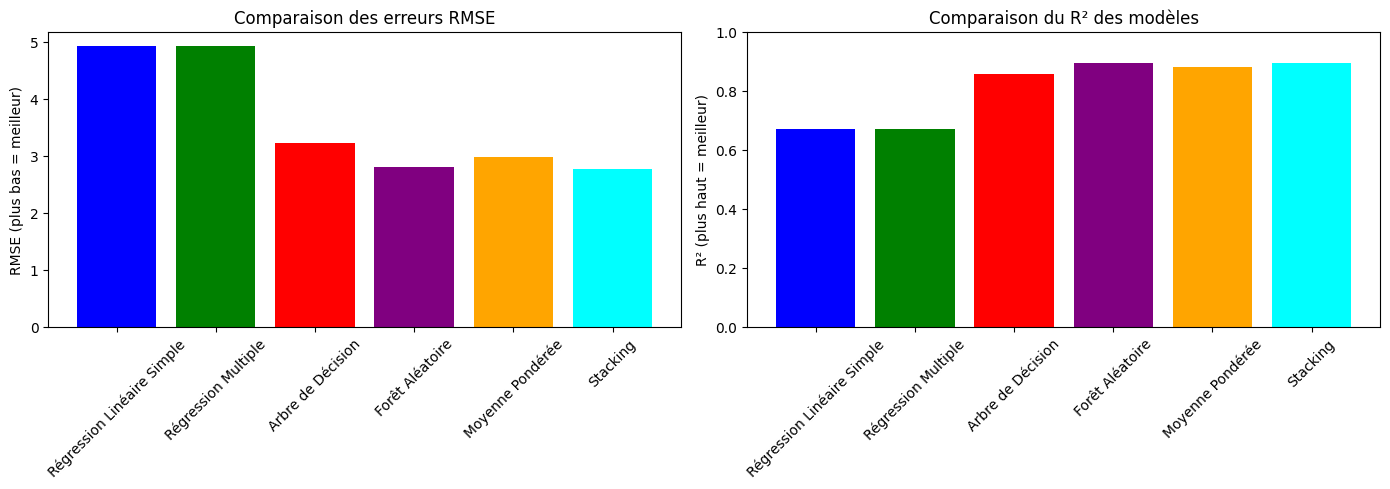

In [184]:
import matplotlib.pyplot as plt
import numpy as np

# Noms des modèles
models = ["Régression Linéaire Simple", "Régression Multiple", "Arbre de Décision",
          "Forêt Aléatoire", "Moyenne Pondérée", "Stacking"]

# Scores RMSE et R²
rmse_scores = [rmse_lr_simple, rmse_lr_multiple, rmse_dt, rmse_rf, rmse_weighted, rmse_stacking]
r2_scores = [r2_lr_simple, r2_lr_multiple, r2_dt, r2_rf, r2_weighted, r2_stacking]

# Création de sous-graphiques pour comparer RMSE et R²
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Graphique RMSE
ax[0].bar(models, rmse_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
ax[0].set_ylabel("RMSE (plus bas = meilleur)")
ax[0].set_title("Comparaison des erreurs RMSE")
ax[0].tick_params(axis='x', rotation=45)

# Graphique R²
ax[1].bar(models, r2_scores, color=['blue', 'green', 'red', 'purple', 'orange', 'cyan'])
ax[1].set_ylabel("R² (plus haut = meilleur)")
ax[1].set_ylim(0, 1)
ax[1].set_title("Comparaison du R² des modèles")
ax[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


**Interprètation**

 Le modèle empilé (stacking) a un RMSE plus bas que la moyenne pondérée, ce qui signifie qu'il fait de meilleures prédictions en moyenne.
 Le stacking combine mieux les modèles en capturant les forces de chacun et en corrigeant leurs faiblesses, ce qui explique pourquoi il est plus performant.
Le stacking a le meilleur
𝑅
2, ce qui signifie qu’il explique mieux la variance des données cibles.
La différence est de 0.02, ce qui indique une légère amélioration en faveur du stacking.
𝑅
2 proche de 1 signifie que le modèle explique bien la variabilité des données.
Avec 0.90, le stacking réussit à capter 90% de la variance des données, ce qui est un très bon score.
La moyenne pondérée reste solide avec 88%, donc une alternative fiable et plus simple.


**Conclusion**

L'objectif de cette étude était de comparer différentes méthodes de régression pour améliorer la précision des prédictions. Nous avons testé plusieurs modèles individuels, puis exploré des techniques d'agrégation comme la moyenne pondérée et le stacking afin d'optimiser les performances.

Le stacking est la meilleure solution en termes de précision et de robustesse.
La moyenne pondérée reste un compromis efficace, surtout si les ressources computationnelles sont limitées.

L’agrégation des modèles améliore significativement les performances, confirmant l'intérêt des approches hybrides en machine learning.

